In [1]:
import elf
import h5py
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
baseline = 'revPBE'
reference = 'PBE'
system = 'monomers'

In [85]:
elfs = elf.utils.hdf5_to_elfs(baseline + '/elfs/basis_default/{}_processed.hdf5'.format(system),'oh')

angles = np.concatenate([[e.angles for e in e] for e in elfs], axis = 0)
values = np.concatenate([[e.value for e in e] for e in elfs], axis = 0 )

{'r_o_o': 0.9, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.35, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}


In [86]:
tar_baseline= np.genfromtxt(baseline + '/' + system + '/forces.dat', delimiter = ',') 
tar_reference = np.genfromtxt(reference + '/' + system + '/forces.dat', delimiter = ',') 
targets = tar_reference - tar_baseline
targets_oriented = np.array(targets)

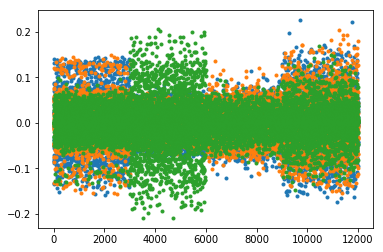

In [87]:
plot(targets, ls = '', marker ='.')

In [88]:
for i,_ in enumerate(targets):
    targets_oriented[i] = elf.geom.rotate_vector(targets[i:i+1], angles[i], inverse=True) 

In [89]:
angles[::3]

array([[-0.        ,  0.        ,  0.53620864],
       [ 0.        ,  3.14159265,  0.6343335 ],
       [-1.4905213 ,  0.35953092,  2.53050709],
       ...,
       [ 0.49536658,  2.60209658,  2.85874237],
       [ 2.87572081,  2.19454379, -0.91942628],
       [ 0.0961477 ,  2.10053681,  1.03815046]])

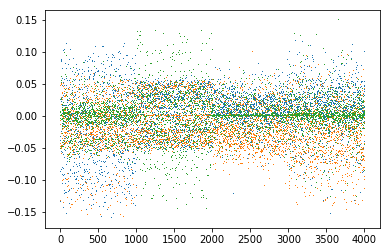

In [90]:
plot(targets[2::3], ls = '', marker = ',')

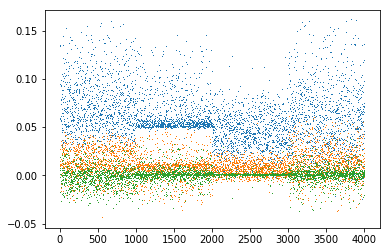

In [92]:
plot(targets_oriented[2::3], ls ='', marker = ',')

{'r_o_o': 0.9, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.35, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}


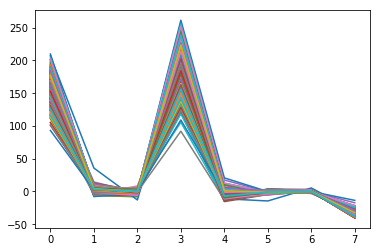

In [78]:
elfs = elf.utils.hdf5_to_elfs(baseline + '/elfs/basis_default_nn/{}_processed.hdf5'.format(system),'h')
values = np.concatenate([[e.value for e in e] for e in elfs], axis = 0 )
plot(values[::9].T);

{'r_o_o': 0.9, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.35, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}


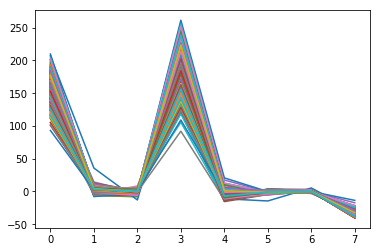

In [79]:
elfs = elf.utils.hdf5_to_elfs(baseline + '/elfs/basis_default_nn/{}_processed.hdf5'.format(system),'h')
values = np.concatenate([[e.value for e in e] for e in elfs], axis = 0 )
plot(values[::9].T);

In [18]:
baseline = 'revPBE'
system = '128'
elfs = elf.utils.hdf5_to_elfs(baseline + '/elfs/basis_default_elf/{}_processed.hdf5'.format(system),'oh')

angles = np.concatenate([[e.angles for e in e] for e in elfs], axis = 0)
values = np.concatenate([[e.value for e in e] for e in elfs], axis = 0 )

{'r_o_o': 0.9, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.35, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}


In [19]:
elfs_new = elf.utils.hdf5_to_elfs('./revPBE_new/{}_processed.hdf5'.format(system),'oh')

angles_new = np.concatenate([[e.angles for e in e] for e in elfs_new], axis = 0)
values_new = np.concatenate([[e.value for e in e] for e in elfs_new], axis = 0 )

{'r_o_o': 0.9, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.35, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}


In [20]:
for v, vn in zip(values,values_new):
    assert np.allclose(np.array(v),np.array(vn))